# Wine Quality

In [2]:
import os
os.chdir("E:\\IVY\\Python\\Project\\Wine")

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew 


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

%matplotlib inline

from sklearn.metrics import classification_report
from pycm import *
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
data = pd.read_csv("wine.csv")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
data.shape

(1599, 12)

# Checking if the data is imbalanced or not

In [12]:
100*(data['quality'].astype('object').value_counts()/len(data.index))

5   42.589
6   39.900
7   12.445
4    3.315
8    1.126
3    0.625
Name: quality, dtype: float64

### Data is not imbalanced

# Outlier

### Using the Interquartile Rule to Find Outliers.
- Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers). Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile. Any number below than this is a suspected outlier.

In [13]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s's outliers =%d (%.2f%%)" % (k, np.shape(v_col)[0], perc))

Column fixed acidity's outliers =49 (3.06%)
Column volatile acidity's outliers =19 (1.19%)
Column citric acid's outliers =1 (0.06%)
Column residual sugar's outliers =155 (9.69%)
Column chlorides's outliers =112 (7.00%)
Column free sulfur dioxide's outliers =33 (2.06%)
Column total sulfur dioxide's outliers =58 (3.63%)
Column density's outliers =45 (2.81%)
Column pH's outliers =35 (2.19%)
Column sulphates's outliers =59 (3.69%)
Column alcohol's outliers =14 (0.88%)
Column quality's outliers =28 (1.75%)


### Boxplot Method

<function matplotlib.pyplot.show(*args, **kw)>

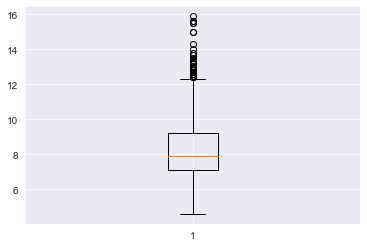

In [14]:
plt.boxplot(data["fixed acidity"])
plt.show

In [15]:
data1 = data[data["fixed acidity"]<12]

<function matplotlib.pyplot.show(*args, **kw)>

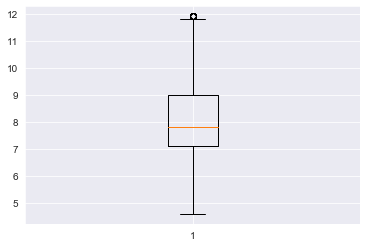

In [16]:
plt.boxplot(data1["fixed acidity"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

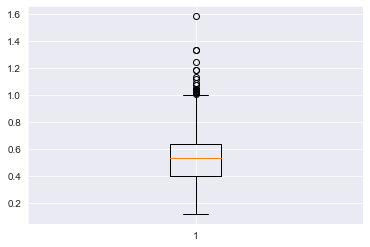

In [17]:
plt.boxplot(data1["volatile acidity"])
plt.show

In [18]:
data2 = data1[data1["volatile acidity"]<1]

<function matplotlib.pyplot.show(*args, **kw)>

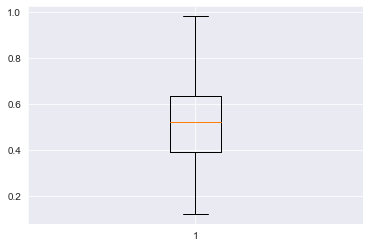

In [19]:
plt.boxplot(data2["volatile acidity"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

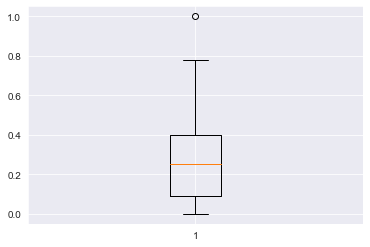

In [20]:
plt.boxplot(data2["citric acid"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

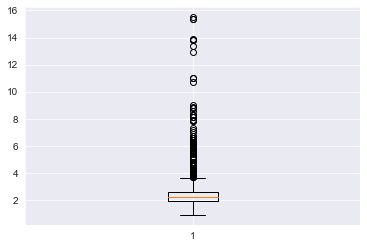

In [21]:
plt.boxplot(data2["residual sugar"])
plt.show

In [22]:
data3 = data2[data2["residual sugar"]<3.5]

<function matplotlib.pyplot.show(*args, **kw)>

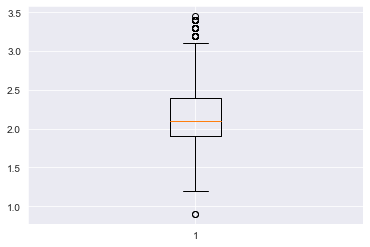

In [23]:
plt.boxplot(data3["residual sugar"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

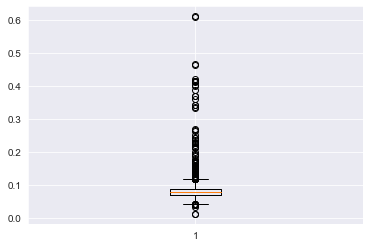

In [24]:
plt.boxplot(data3["chlorides"])
plt.show

In [25]:
q1,q2,q3 = np.percentile(data3["chlorides"],[25,50,75])

In [26]:
iqr = q3 -q1

In [27]:
lower = q1-1.5 * iqr

In [28]:
lower

0.0415

In [29]:
upper = q3 + 1.5 * iqr

In [30]:
upper

0.11750000000000002

In [31]:
data4= data3[(data3["chlorides"]<0.1175) & (data3["chlorides"]>0.0415)]

<function matplotlib.pyplot.show(*args, **kw)>

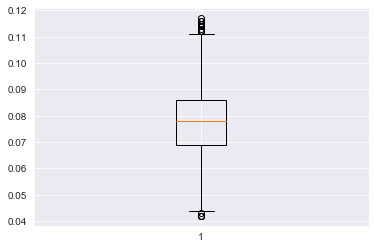

In [32]:
plt.boxplot(data4["chlorides"])
plt.show

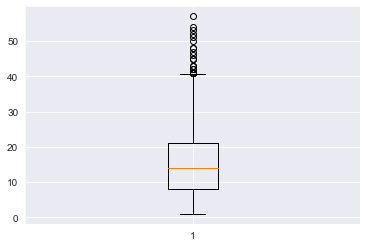

In [33]:
plt.boxplot(data4["free sulfur dioxide"])
plt.show()

In [34]:
data5 = data4[data4["free sulfur dioxide"]<39]

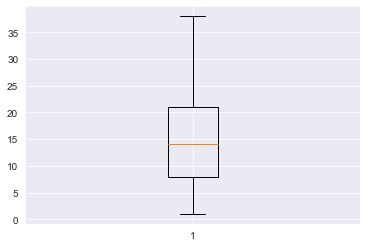

In [35]:
plt.boxplot(data5["free sulfur dioxide"])
plt.show()

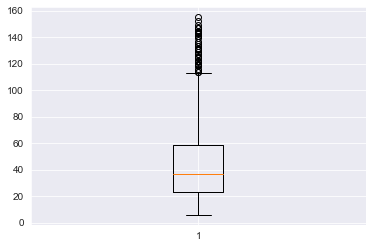

In [36]:
plt.boxplot(data5["total sulfur dioxide"])
plt.show()

In [37]:
data6 = data5[data5["total sulfur dioxide"]<112]

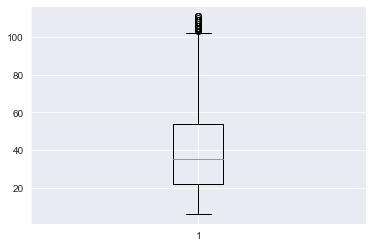

In [38]:
plt.boxplot(data6["total sulfur dioxide"])
plt.show()

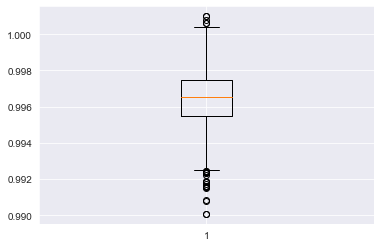

In [39]:
plt.boxplot(data6["density"])
plt.show()

In [40]:
q1,q2,q3= np.percentile(data6["density"],(25,50,75))

In [41]:
iqr= q3-q1

In [42]:
upper = q3+ 1.5*iqr

In [43]:
upper

1.00046

In [44]:
lower = q1- 1.5*iqr

In [45]:
lower

0.99246

In [46]:
data7 = data6[(data6["density"]<1.00046) & (data6["density"]>0.99246)]

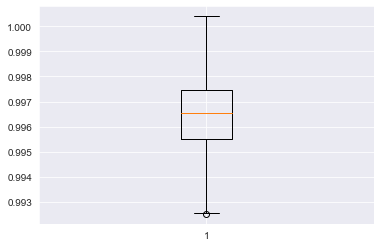

In [47]:
plt.boxplot(data7["density"])
plt.show()

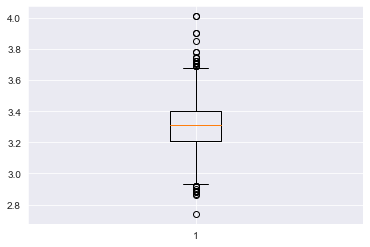

In [48]:
plt.boxplot(data["pH"])
plt.show()

In [49]:
q1,q2,q3 = np.percentile(data7["pH"],(25,50,75))

In [50]:
iqr = q3-q1

In [51]:
upper = q3+1.5*iqr

In [52]:
upper

3.665

In [53]:
lower = q1-1.5*iqr

In [54]:
lower

2.9850000000000003

In [55]:
data8 = data7[(data7["pH"]<3.665) & (data7["pH"]>2.98500)]

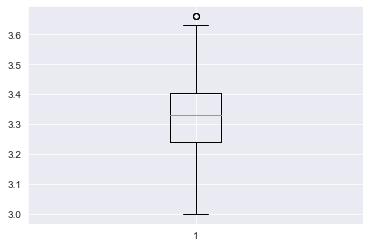

In [56]:
plt.boxplot(data8["pH"])
plt.show()

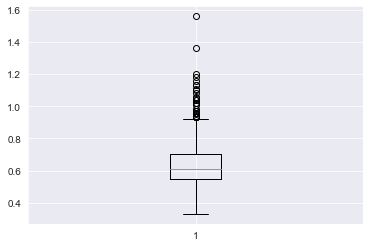

In [57]:
plt.boxplot(data8["sulphates"])
plt.show()

In [58]:
data9= data8[data8["sulphates"]<0.85]

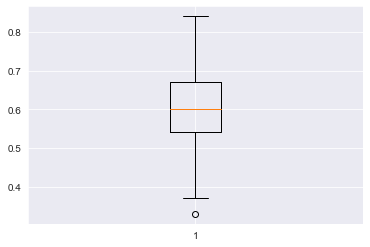

In [59]:
plt.boxplot(data9["sulphates"])
plt.show()

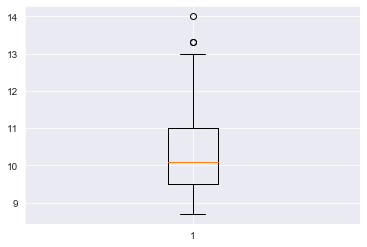

In [60]:
plt.boxplot(data9['alcohol'])
plt.show()

In [61]:
data = data9

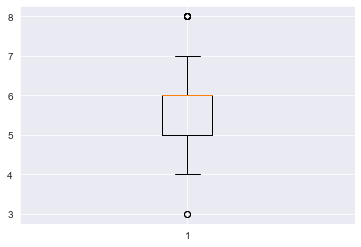

In [62]:
plt.boxplot(data["quality"])
plt.show()

#### Plotting the boxplots again.

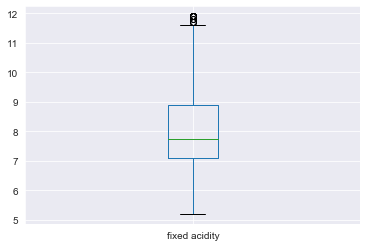

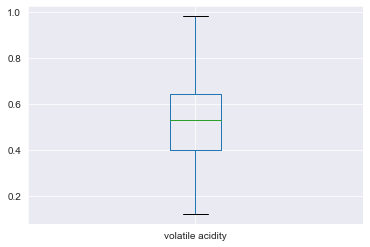

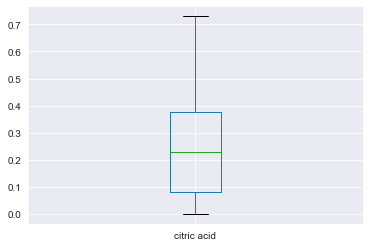

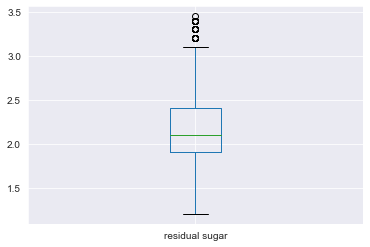

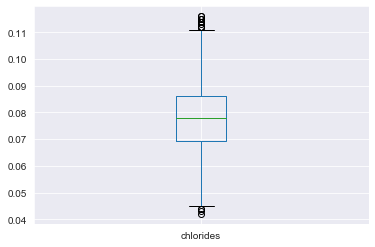

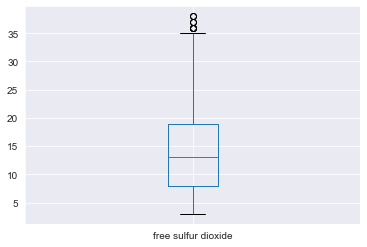

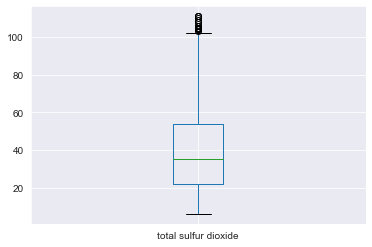

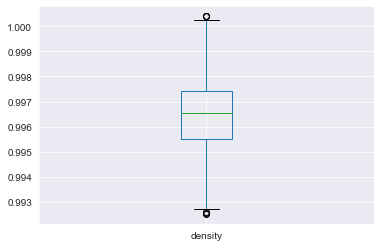

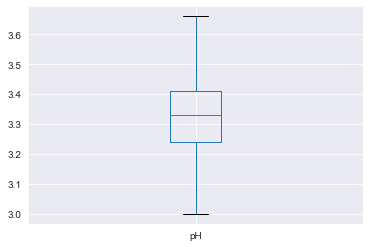

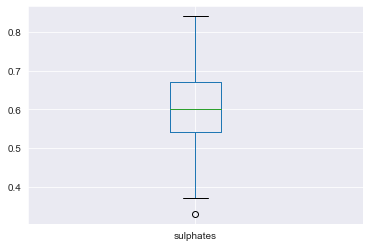

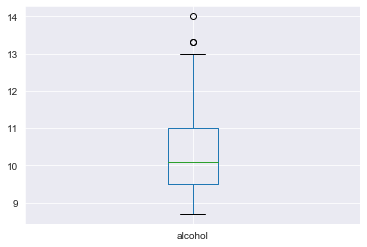

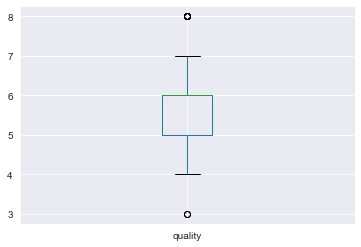

In [63]:
for col in data.columns:
    plt.figure()
    data[col].plot(kind = 'box')

In [64]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s's outliers =%d (%.2f%%)" % (k, np.shape(v_col)[0], perc))

Column fixed acidity's outliers =13 (1.25%)
Column volatile acidity's outliers =0 (0.00%)
Column citric acid's outliers =0 (0.00%)
Column residual sugar's outliers =28 (2.70%)
Column chlorides's outliers =22 (2.12%)
Column free sulfur dioxide's outliers =8 (0.77%)
Column total sulfur dioxide's outliers =23 (2.22%)
Column density's outliers =6 (0.58%)
Column pH's outliers =0 (0.00%)
Column sulphates's outliers =1 (0.10%)
Column alcohol's outliers =3 (0.29%)
Column quality's outliers =9 (0.87%)


#### Outliers has been reduced significantly

# Missing Values

In [65]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### No missing values to handle

# Target Feature

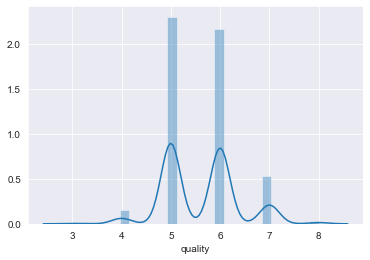

In [66]:
sns.distplot(data["quality"])

In [67]:
pd.Series(data.quality.value_counts().sort_values(ascending = False))

5    459
6    432
7    107
4     31
8      7
3      2
Name: quality, dtype: int64

# Correlation 

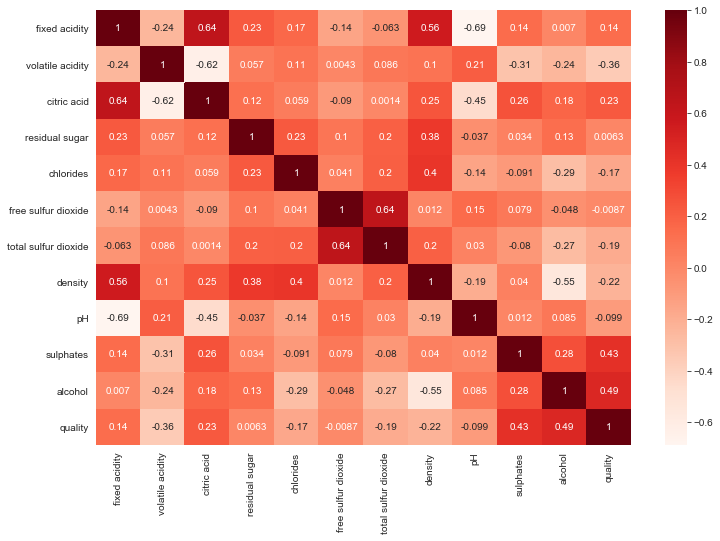

In [68]:
plt.figure(figsize=(12,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Using Pearson Correlation


In [69]:
print("Find most important features relative to target")
cor.sort_values(['quality'], ascending=False, inplace=True)
cor.quality

Find most important features relative to target


quality                 1.000
alcohol                 0.487
sulphates               0.428
citric acid             0.232
fixed acidity           0.137
residual sugar          0.006
free sulfur dioxide    -0.009
pH                     -0.099
chlorides              -0.166
total sulfur dioxide   -0.186
density                -0.223
volatile acidity       -0.356
Name: quality, dtype: float64

### Plotting Pair Plots

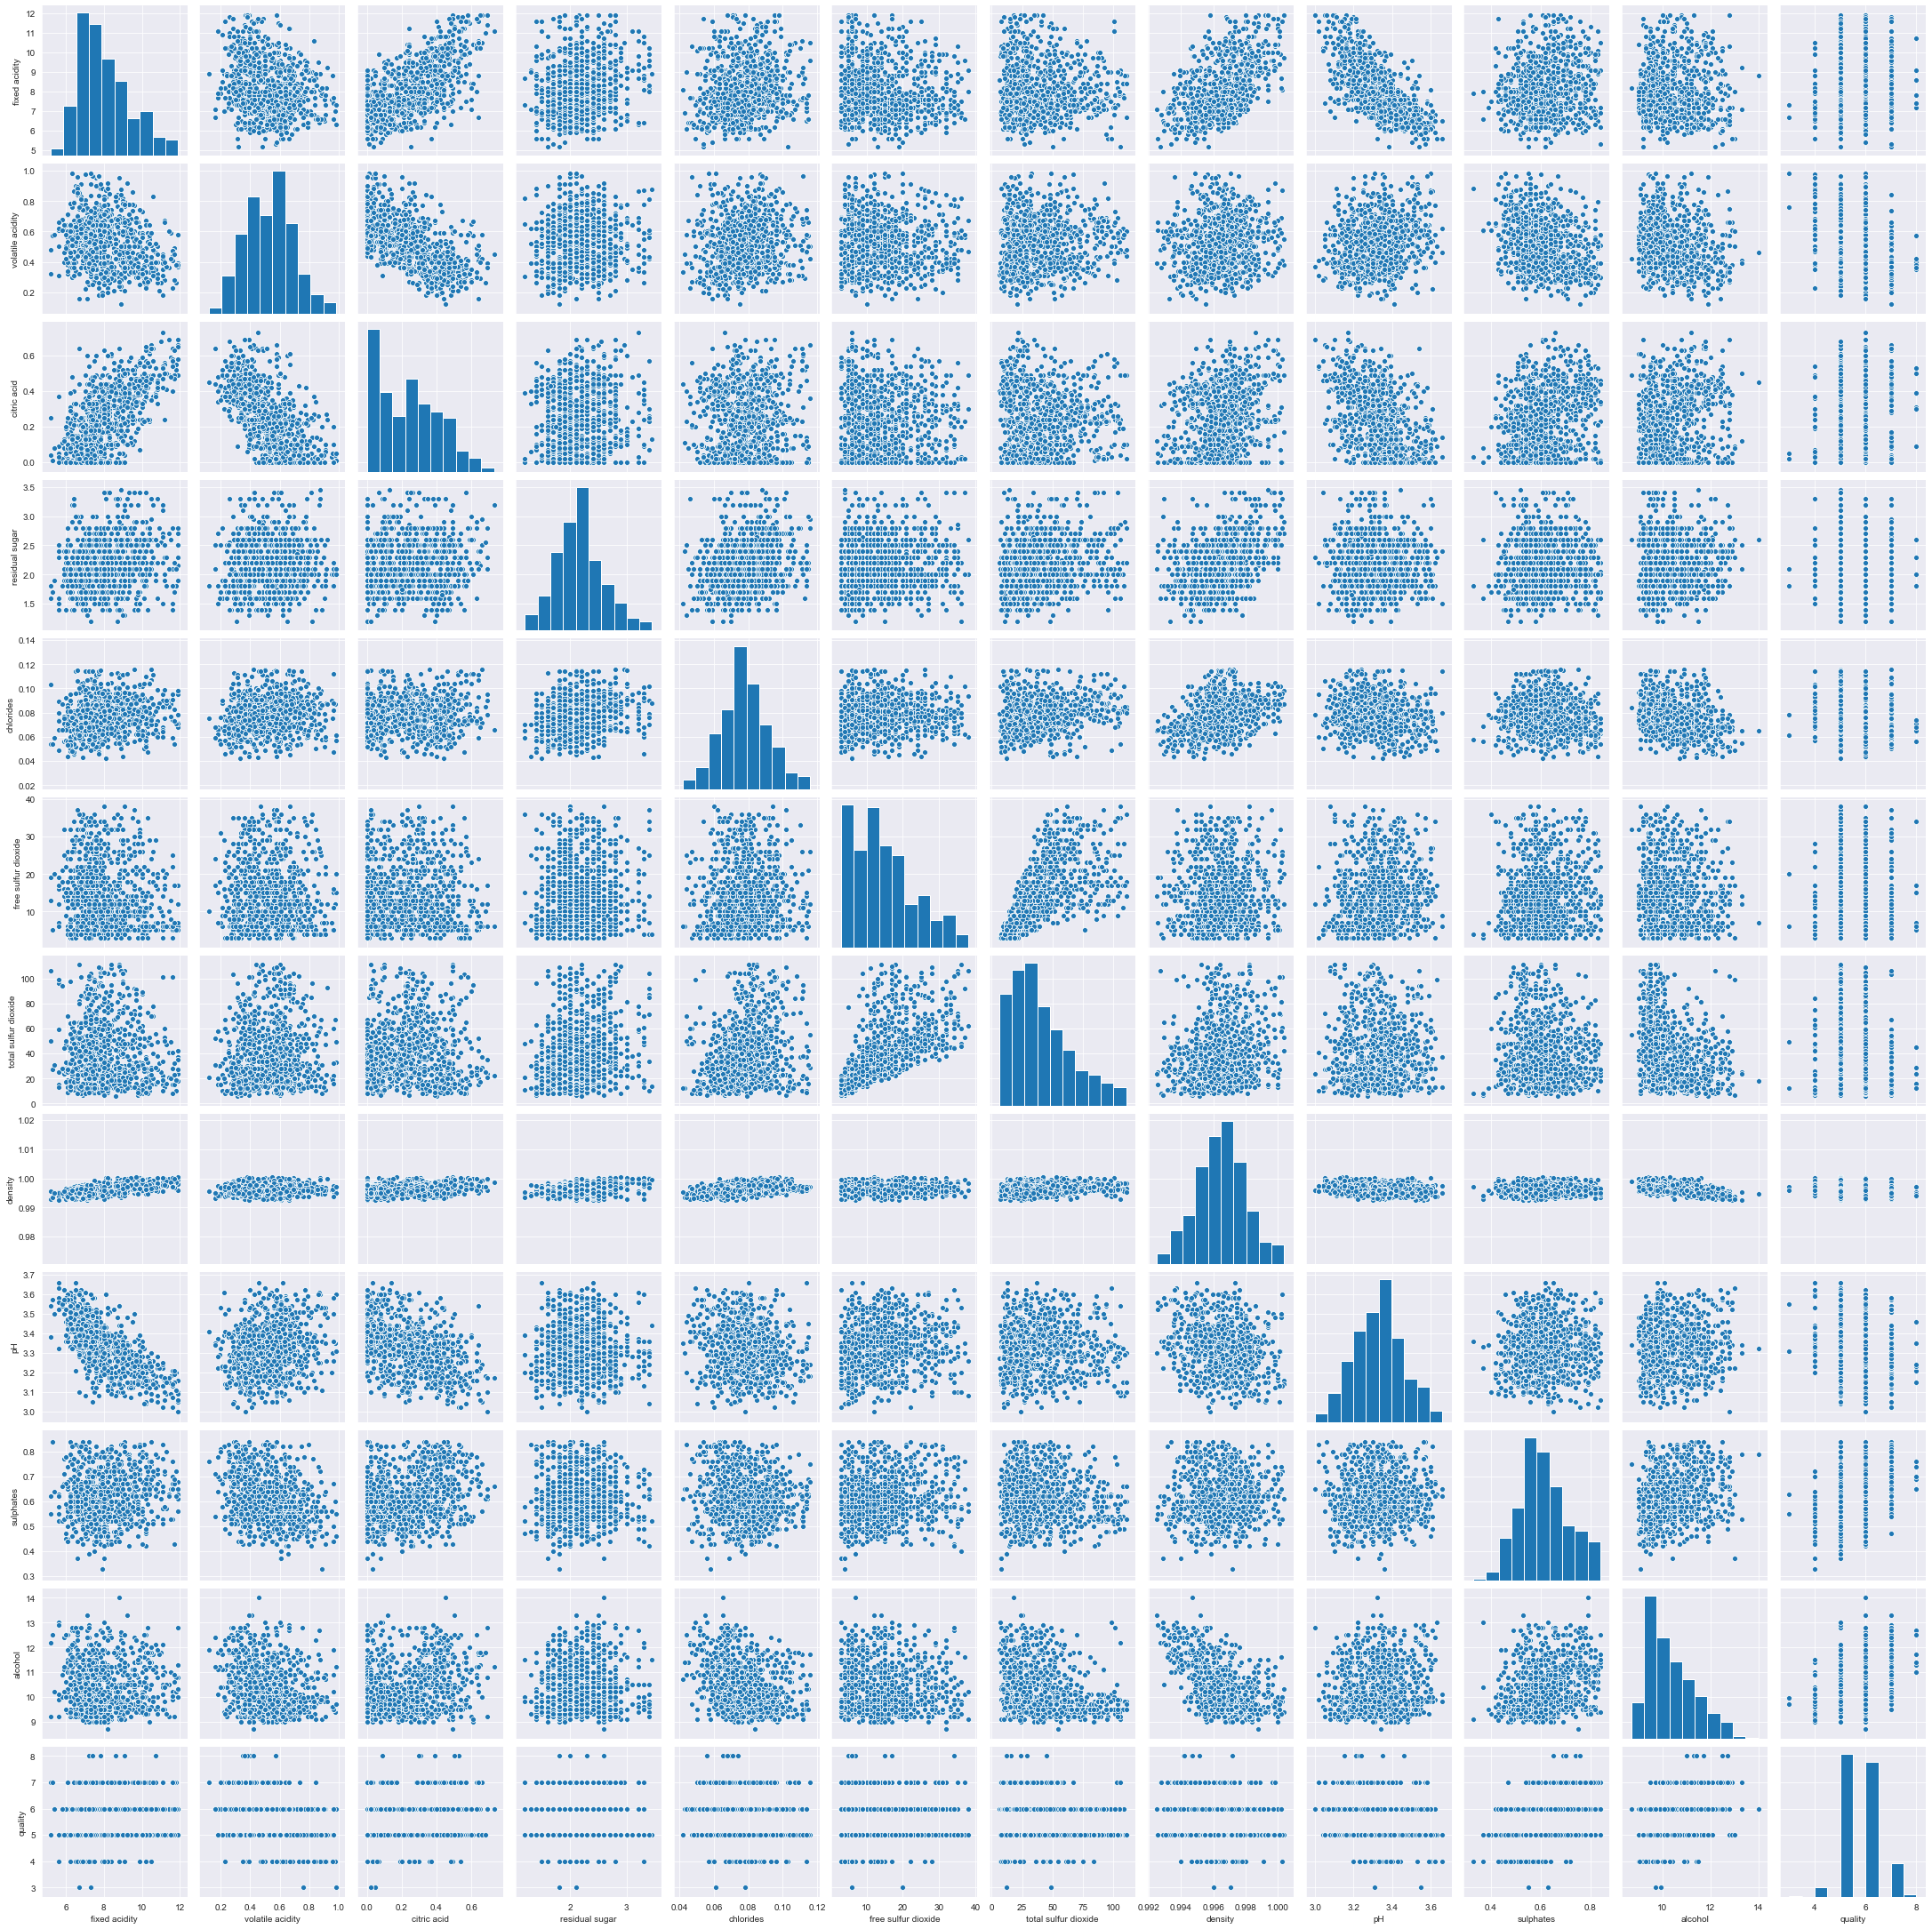

In [70]:
sns.pairplot(data)
plt.show()

### Plotting highly correlated columns with quality

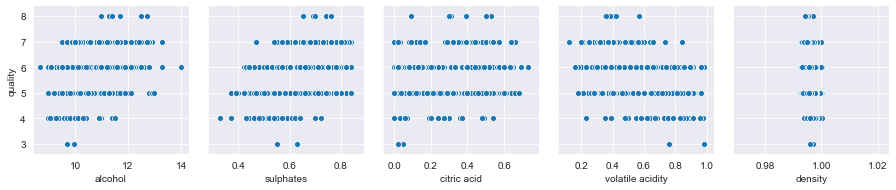

In [69]:
sns.pairplot(data,x_vars = ('alcohol','sulphates','citric acid', 'volatile acidity','density'), y_vars=('quality'))
plt.show()

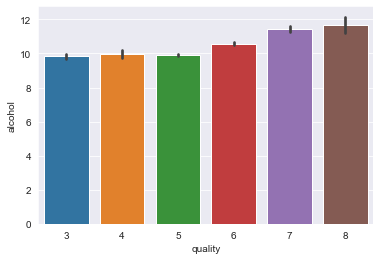

In [70]:
sns.barplot(data.quality, data.alcohol)
plt.show()

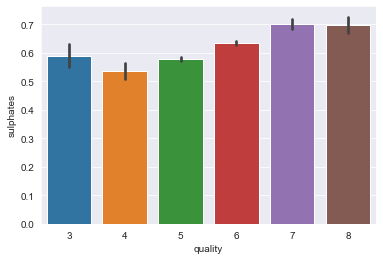

In [71]:
sns.barplot(data.quality,data.sulphates)
plt.show()

# Splitting Data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = data.drop("quality",axis=1)
y = data.quality

### Converting the data into two classes, above 5 : 1 and below 5 : 0. 

In [74]:
y1 = (y>5).astype('int64')
y1.value_counts()

1    546
0    492
Name: quality, dtype: int64

In [75]:
from sklearn import preprocessing

In [76]:
std_scaler = preprocessing.StandardScaler().fit(X)

- It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.

In [77]:
train_x,test_x,train_y,test_y = train_test_split(X,y1,random_state = 0, test_size=.2)

# Definitions

#### Accuracy
The most used and classic classification metric : Suited for binary classification problems.
Accuracy = ( TP + TN ) / (TP + TN + FP + FN ).
Basically Rightly predicted results amongst all the results , used when the classes are balanced


#### Precision
What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !
Precision = ( TP ) / ( TP + FP )

#### Recall
What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible.
Recall = TP / ( TP + FN )

#### F1 Score

Harmonic mean of Precision and Recall. 
F1 = 2*(precision * recall) / (precision + recall ).
It basically maintains a balance between the precision and recall for your classifier

#### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

#### Classification Report

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report 

#### ROC_AUC
It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class. 

Let's talk about some definitions first: 

### Sensitivity 

The sensitivity of a model is defined by the proportion of actual positives that are classified as Psitives , i.e = TP / ( TP + FN )


### Specificity

The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )




As we can see that both are independent of each other and lie in two different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.

#### ROC CURVE

It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. 
It depicts if a model can clearly identify each class or not.
Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.

# Classification

## Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Properties of Logistic Regression:

- The dependent variable in logistic regression follows Bernoulli Distribution.
- Estimation is done through maximum likelihood.
- No R Square, Model fitness is calculated through Concordance, KS-Statistics.

Sigmoid Function

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

In [78]:
from sklearn.linear_model import LogisticRegression    

In [79]:
log_reg = LogisticRegression(random_state=0, multi_class="ovr") #multi_class='multinomial'

In [80]:
log_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [81]:
y_pred=log_reg.predict(test_x)

In [82]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [83]:
import numpy as np
mislabel = np.sum((test_y!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 208 test samples is 46


#### Accuracy

In [84]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 77.88461538461539


#### Classification Report

In [85]:
target_names = ['class 0','class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.82      0.77        92
     class 1       0.84      0.75      0.79       116

    accuracy                           0.78       208
   macro avg       0.78      0.78      0.78       208
weighted avg       0.79      0.78      0.78       208



#### Confusion matrix 

In [86]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[75, 17],
       [29, 87]], dtype=int64)

## XG Boost

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher.

In [87]:
from xgboost import XGBClassifier

In [88]:
model = XGBClassifier()

In [89]:
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [90]:
y_pred = model.predict(test_x)

In [91]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [92]:
import numpy as np
mislabel = np.sum((test_y!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 208 test samples is 46


#### Accuracy

In [93]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 77.88461538461539


#### Confusion Matrix

In [94]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[71, 21],
       [25, 91]], dtype=int64)

#### Classification Report

In [95]:
target_names = ['class 0', 'class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.77      0.76        92
     class 1       0.81      0.78      0.80       116

    accuracy                           0.78       208
   macro avg       0.78      0.78      0.78       208
weighted avg       0.78      0.78      0.78       208



## SVM

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

Support Vectors

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

Hyperplane

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

Margin

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.




In [96]:
from sklearn.svm import SVC

In [97]:
svc_classifier = SVC(kernel = 'linear',C=1)

In [98]:
svc_classifier.fit(train_x,train_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
y_pred= svc_classifier.predict(test_x)

In [100]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [101]:
mislabel = np.sum((test_y!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 208 test samples is 47


#### Accuracy

In [102]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 77.40384615384616


#### Confusion Matrix

In [103]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[76, 16],
       [31, 85]], dtype=int64)

#### Classification Matrix

In [104]:
target_names = ['class 0', 'class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.83      0.76        92
     class 1       0.84      0.73      0.78       116

    accuracy                           0.77       208
   macro avg       0.78      0.78      0.77       208
weighted avg       0.78      0.77      0.77       208



## Decision Trees

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

The basic idea behind any decision tree algorithm is as follows:

- Select the best attribute using Attribute Selection Measures(ASM) to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.


In [105]:
 from sklearn import tree

In [106]:
clf = tree.DecisionTreeClassifier()

In [107]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
y_pred = clf.predict(test_x)

In [109]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [110]:
mislabel = np.sum((test_y!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 208 test samples is 52


#### Accuracy

In [111]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 75.0


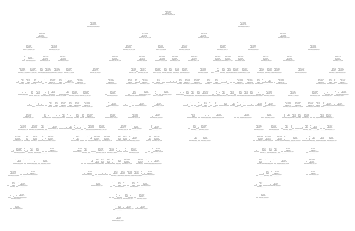

In [112]:
tree.plot_tree(clf.fit(X,y))
plt.show()

In [113]:
target_names = ['class 0','class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.72      0.72        92
     class 1       0.78      0.78      0.78       116

    accuracy                           0.75       208
   macro avg       0.75      0.75      0.75       208
weighted avg       0.75      0.75      0.75       208



In [114]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[66, 26],
       [26, 90]], dtype=int64)

## Naive Bayes

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

The classification has two phases, a learning phase, and the evaluation phase. In the learning phase, classifier trains its model on a given dataset and in the evaluation phase, it tests the classifier performance. Performance is evaluated on the basis of various parameters such as accuracy, error, precision, and recall.

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.



In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
gnb = GaussianNB()

In [117]:
gnb.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
y_pred = gnb.predict(test_x)

In [119]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [120]:
mislabel = np.sum((test_y!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 208 test samples is 41


#### Accuracy

In [121]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 80.28846153846155


#### Classification Matrix

In [122]:
target_names = ['class 0','class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.88      0.80        92
     class 1       0.89      0.74      0.81       116

    accuracy                           0.80       208
   macro avg       0.81      0.81      0.80       208
weighted avg       0.82      0.80      0.80       208



#### Confusion Matrix

In [123]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[81, 11],
       [30, 86]], dtype=int64)

## K-NN

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm.

KNN has the following basic steps:
- Calculate distance
- Find closest neighbors
- Vote for labels

KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

In [124]:
from sklearn.neighbors import KNeighborsClassifier
import math

In [125]:
math.sqrt(len(test_y))

14.422205101855956

In [126]:
classifier = (KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean'))

In [127]:
classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [128]:
y_pred=classifier.predict(test_x)

In [129]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [130]:
mislabel = np.sum((test_y!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(test_y),mislabel))

Total number of mislabelled data points from 208 test samples is 74


#### Accuracy

In [131]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 64.42307692307693


#### Classification Report

In [132]:
target_names = ['class 0', 'class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.65      0.62        92
     class 1       0.70      0.64      0.67       116

    accuracy                           0.64       208
   macro avg       0.64      0.65      0.64       208
weighted avg       0.65      0.64      0.65       208



#### Confusion Matrix

In [133]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[60, 32],
       [42, 74]], dtype=int64)

## Random Forest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
model = RandomForestClassifier()

In [136]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
y_pred = model.predict(test_x)

In [138]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 82.6923076923077


#### Classification Report

In [140]:
target_names = ['class 0', 'class 1']
print(classification_report(test_y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.79      0.83      0.81        92
     class 1       0.86      0.83      0.84       116

    accuracy                           0.83       208
   macro avg       0.82      0.83      0.83       208
weighted avg       0.83      0.83      0.83       208



#### Confusion Matrix

In [141]:
confusion = metrics.confusion_matrix( test_y, y_pred )
confusion

array([[76, 16],
       [20, 96]], dtype=int64)

## Models
- Logistic Regression accuracy 77.88%
- SVM accuracy 77.4%
- XGBoost accuracy 77.88%
- Decision Trees accuracy 75%
- Naive Bayes accuracy 80.2%
- KNN accuracy 64%
- Random Forest accuracy 82.73%

## Diving further into Random Forest Classifier because it got maximum accuracy

### Log-Loss
Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. ... Log loss increases as the predicted probability diverges from the actual label.

In [142]:
probs = model.predict_proba(test_x)
probs = probs[:, 1]

In [143]:
loss = log_loss(test_y, probs)
loss

0.4020802406542118

### Finding best parameters for the model

In [144]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2,10, 2),
    'n_estimators': [100,200,300], 
    'max_features': [5, 10]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [145]:
grid_search.fit(train_x, train_y)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [146]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.766284727672265 using {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=1, 
                             min_samples_split=2,
                             max_features=5,
                             n_estimators=200)

In [148]:
rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
y_pred = rfc.predict(test_x)

In [150]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        92
           1       0.85      0.83      0.84       116

    accuracy                           0.82       208
   macro avg       0.82      0.82      0.82       208
weighted avg       0.82      0.82      0.82       208



In [151]:
print("Accuracy of test set=",accuracy_score(test_y, y_pred)*100)

Accuracy of test set= 82.21153846153845


No handles with labels found to put in legend.


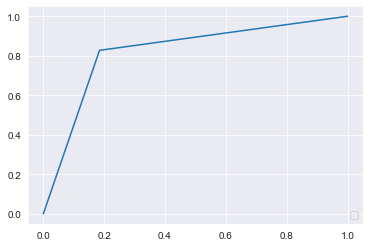

In [153]:
y_pred_proba = rfc.predict_proba(test_x)[::,1]
fpr, tpr, _ = roc_curve(test_y,  y_pred)
auc = roc_auc_score(test_y, y_pred)
plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()

In [155]:
auc

0.8214017991004499